# Data Preprocessing
Data preprocessing is a crucial step in the data mining and data analysis process that transforms raw data into a format that can be understood and analyzed by computers and machine learning algorithms  . Raw data is often messy, incomplete, and inconsistent, and may contain errors and irrelevant information. Data preprocessing involves cleaning, transforming, integrating, and reducing the size of data to improve its quality and make it more suitable for analysis  . Some common steps in data preprocessing include:

- Data cleaning: identifying and correcting errors or inconsistencies in the data, such as missing values, outliers, and duplicates.
- Data integration: combining data from multiple sources to create a unified dataset.
- Data transformation: converting the data into a suitable format for analysis.
- Data reduction: reducing the size of the dataset while preserving the important information.

Data preprocessing is essential to ensure the quality of data and the accuracy of the analysis results. Good preprocessed data is even more important than the most powerful algorithms, as machine learning models trained with bad data could actually be harmful to the analysis you’re trying to do . By performing these steps, the data mining process becomes more efficient and the results become more accurate .


(1) What Is Data Preprocessing & What Are The Steps Involved? - MonkeyLearn. https://monkeylearn.com/blog/data-preprocessing/.
(2) Data Preprocessing in Data Mining - GeeksforGeeks. https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/.
(3) Data Preprocessing - Wikipedia. https://en.wikipedia.org/wiki/Data_Preprocessing.
(4) What Is Data Preprocessing and Who Uses It? | Indeed.com. https://www.indeed.com/career-advice/career-development/what-is-data-preprocessing.

## Data Cleaning
Data cleaning, also referred to as data cleansing and data scrubbing, is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset¹. It is an essential step in data analysis as the quality of your insights and analysis depends on the quality of your data¹. 

Data cleaning involves identifying and correcting errors, inconsistencies, and inaccuracies in the data to improve its quality and usability³. It includes removing duplicate or irrelevant observations, fixing structural errors, handling missing data, and more¹. The exact steps in the data cleaning process may vary depending on the dataset, but it is crucial to establish a template for your data cleaning process to ensure consistency¹.

Data cleaning is different from data transformation, which involves converting data from one format or structure into another¹. While data cleaning focuses on removing data that does not belong in your dataset, data transformation involves changing the format or structure of the data¹.

If you're interested in learning more about data cleaning and its importance, you can refer to the following resources:
- [Tableau's guide to data cleaning](^1^)
- [CareerFoundry's article on data cleaning](^2^)
- [GeeksforGeeks overview of data cleaning](^3^)




1. Data Cleaning: Definition, Benefits, And How-To | Tableau. https://www.tableau.com/learn/articles/what-is-data-cleaning.
2. ML | Overview of Data Cleaning - GeeksforGeeks. https://www.geeksforgeeks.org/data-cleansing-introduction/.
3. Data Cleaning: Definition, Benefits, And How-To | Tableau. https://www.tableau.com/learn/articles/what-is-data-cleaning.
4. What Is Data Cleaning and Why Does It Matter? - CareerFoundry. https://careerfoundry.com/en/blog/data-analytics/what-is-data-cleaning/.


### Import our data to our program
we will do regression for price of bulldozer, and this data is on kaggel we can download it from <br/>
this link: 


In [83]:
# import pandas for manipulate our data 
import pandas as pd
# read csv file with (read_csv() method from pandas)
PATH_TRAIN_DATA = "E:/Data_Scientist/Projects/Bulldozer_Price_Prediction/Data/Train.csv"
data = pd.read_csv(PATH_TRAIN_DATA)

C:\Users\ELBOSTAN\AppData\Local\Temp\ipykernel_3336\3391233014.py:5: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(PATH_TRAIN_DATA)


### see some information about the data


In [84]:
# see some info about our data
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(data.head())

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate fiModelDesc  \
0                      68.0       Low  11/16/2006 0:00        521D   
1                    4640.0       Low   3/26/2004 0:00      950FII   
2                    2838.0      High   2/26/2004 0:00         226   
3                    3486.0      High   5/19/2011 0:00    PC120-6E   
4                     722.0    Medium   7/23/2009 0:00        S175   

  fiBaseModel fiSecondaryDesc fiModelSeries fiModelDescriptor ProductSize  \
0         521  

In [85]:
# see info about data
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

we will splite our data to:
- numeric feature 
- categorical feature 
- date feature 

we will split them in sparated dataframes and preprocess them and then concat together.

## splite our data

In [86]:
num_features = data.select_dtypes(include= ['int64', 'float64']).copy()
cat_features = data.select_dtypes(exclude = ['int64', 'float64']).drop('saledate', axis = 1).copy()
date_features = data['saledate'].copy()
# we take copy() of the data because of we don't want to make changes in main data

## Date features

In [87]:
date_features = pd.DataFrame(date_features)
date_features['saledate'] = pd.to_datetime(date_features['saledate'])
date_features.dtypes

saledate    datetime64[ns]
dtype: object

In [88]:
# let's make feature from this year, month and day
date_features['sale_year'] = date_features['saledate'].dt.year
date_features['sale_month'] = date_features['saledate'].dt.month
date_features['sale_day'] = date_features['saledate'].dt.day


In [89]:
# define if there is holyday in this time
# import the holiday calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
# define holidayes
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=date_features['saledate'].min(), end=date_features['saledate'].max())
# define holydayes columns with check
date_features['Holiday'] = date_features['saledate'].isin(holidays)
date_features

,saledate,sale_year,sale_month,sale_day,Holiday
0,2006-11-16,2006,11,16,False
1,2004-03-26,2004,3,26,False
2,2004-02-26,2004,2,26,False
3,2011-05-19,2011,5,19,False
4,2009-07-23,2009,7,23,False
...,...,...,...,...,...
401120,2011-11-02,2011,11,2,False
401121,2011-11-02,2011,11,2,False
401122,2011-11-02,2011,11,2,False
401123,2011-10-25,2011,10,25,False


In [90]:
# last step is drop the saledate after we take the information from it
date_features.drop('saledate', axis=1, inplace=True)

In [91]:
# see the info about date data
print(date_features.head())
print(date_features.info())

   sale_year  sale_month  sale_day  Holiday
0       2006          11        16    False
1       2004           3        26    False
2       2004           2        26    False
3       2011           5        19    False
4       2009           7        23    False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   sale_year   401125 non-null  int64
 1   sale_month  401125 non-null  int64
 2   sale_day    401125 non-null  int64
 3   Holiday     401125 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 9.6 MB
None


## Numiric Features

In [92]:
print(num_features.head())
print('*'*50)
print(num_features.info())
print('*'*80)
print(num_features.isnull().sum())

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter  
0                      68.0  
1                    4640.0  
2                    2838.0  
3                    3486.0  
4                     722.0  
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1  

we have missin values in auctioneerID and MachineHoursCurrentMeter:
- auctioneerID will fill with number indicate that it is miss
- MachineHoursCurrentMeter will fill it with mean or median if it have outliers because it have continous values

In [93]:
num_features['auctioneerID'].fillna(num_features['auctioneerID'].median(), inplace = True)

In [94]:
num_features['MachineHoursCurrentMeter'].fillna(num_features['MachineHoursCurrentMeter'].median(), inplace = True)

<Axes: >

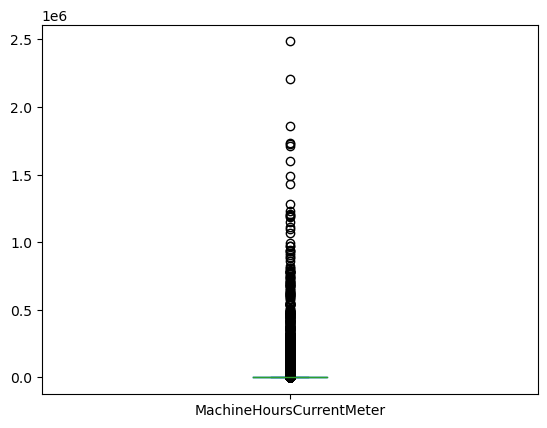

In [95]:
num_features['MachineHoursCurrentMeter'].plot.box()

In [96]:
num_features.var()

SalesID                     8.263201e+11
SalePrice                   5.306987e+08
MachineID                   1.944739e+11
ModelID                     3.871052e+07
datasource                  8.032169e+01
auctioneerID                2.747328e+02
YearMade                    8.514576e+04
MachineHoursCurrentMeter    2.736676e+08
dtype: float64

## Normalization for contious data 

<Axes: ylabel='Frequency'>

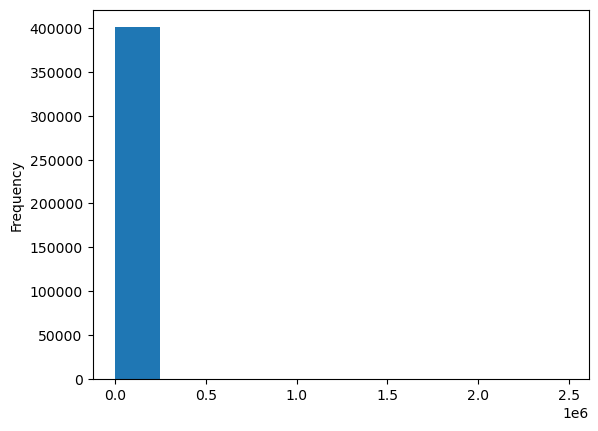

In [97]:
# we take a look for MachineHoursCurrentMeter and we see that its var is big so we want to normalize it
num_features['MachineHoursCurrentMeter'].plot.hist()

In [99]:
import numpy as np
num_features['MachineHoursCurrentMeter'] = np.log(num_features['MachineHoursCurrentMeter']+1)
num_features['MachineHoursCurrentMeter'].var()

0.6894088708063438

<Axes: ylabel='Density'>

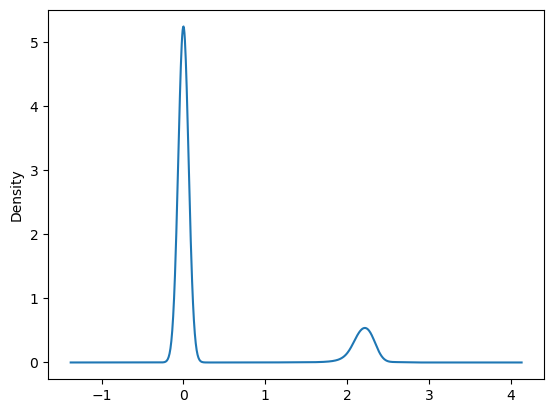

In [101]:
num_features['MachineHoursCurrentMeter'].plot.density()

In [102]:
# let's check some info before we leave it
print(num_features.info())
print('*'*80)
print(num_features.isnull().sum())
print('*'*80)
print(num_features.var())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              401125 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  401125 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 24.5 MB
None
********************************************************************************
SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade     

## Categorical data 

In [103]:
# firstly we see some info about this data
print(cat_features.head())
print('*'*80)
print(cat_features.info())
print('*'*80)
print(cat_features.isnull().sum())

  UsageBand fiModelDesc fiBaseModel fiSecondaryDesc fiModelSeries  \
0       Low        521D         521               D           NaN   
1       Low      950FII         950               F            II   
2      High         226         226             NaN           NaN   
3      High    PC120-6E       PC120             NaN           -6E   
4    Medium        S175        S175             NaN           NaN   

  fiModelDescriptor ProductSize  \
0               NaN         NaN   
1               NaN      Medium   
2               NaN         NaN   
3               NaN       Small   
4               NaN         NaN   

                                  fiProductClassDesc           state  \
0           Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1           Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2  Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3  Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4  Skid Steer 

In [104]:
# we will fill these missing values with "Missing_value"
cat_features = cat_features.fillna("Missing_Value")
print(cat_features.isnull().sum())

UsageBand                  0
fiModelDesc                0
fiBaseModel                0
fiSecondaryDesc            0
fiModelSeries              0
fiModelDescriptor          0
ProductSize                0
fiProductClassDesc         0
state                      0
ProductGroup               0
ProductGroupDesc           0
Drive_System               0
Enclosure                  0
Forks                      0
Pad_Type                   0
Ride_Control               0
Stick                      0
Transmission               0
Turbocharged               0
Blade_Extension            0
Blade_Width                0
Enclosure_Type             0
Engine_Horsepower          0
Hydraulics                 0
Pushblock                  0
Ripper                     0
Scarifier                  0
Tip_Control                0
Tire_Size                  0
Coupler                    0
Coupler_System             0
Grouser_Tracks             0
Hydraulics_Flow            0
Track_Type                 0
Undercarriage_

second step will be `Handling and Encode categorical values` <br/>
because of big of data if we use `one hot encoding` we will make it more big <br/>
so we will use `label encoding`

In [112]:
from sklearn.preprocessing import LabelEncoder

# initialze the Encoder
le = LabelEncoder()
# fit and transform the data
for col in list(cat_features.columns):
    cat_features[col] = le.fit_transform(cat_features['UsageBand'])

In [113]:
print(cat_features.head())

   UsageBand  fiModelDesc  fiBaseModel  fiSecondaryDesc  fiModelSeries  \
0          1            1            1                1              1   
1          1            1            1                1              1   
2          0            0            0                0              0   
3          0            0            0                0              0   
4          2            2            2                2              2   

   fiModelDescriptor  ProductSize  fiProductClassDesc  state  ProductGroup  \
0                  1            1                   1      1             1   
1                  1            1                   1      1             1   
2                  0            0                   0      0             0   
3                  0            0                   0      0             0   
4                  2            2                   2      2             2   

   ...  Undercarriage_Pad_Width  Stick_Length  Thumb  Pattern_Changer  \
0  ...       

In [114]:
cat_features['UsageBand']

0         1
1         1
2         0
3         0
4         2
         ..
401120    3
401121    3
401122    3
401123    3
401124    3
Name: UsageBand, Length: 401125, dtype: int32

## End

here we go we :

- clean our data
- normalize it
- encoding it 

let's make all together

In [115]:
# concate the date 
data_preprocessed = pd.concat([date_features, num_features, cat_features], axis = 1)
data_preprocessed.head()

,sale_year,sale_month,sale_day,Holiday,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,2006,11,16,False,1139246,66000,999089,3157,121,3.0,...,1,1,1,1,1,1,1,1,1,1
1,2004,3,26,False,1139248,57000,117657,77,121,3.0,...,1,1,1,1,1,1,1,1,1,1
2,2004,2,26,False,1139249,10000,434808,7009,121,3.0,...,0,0,0,0,0,0,0,0,0,0
3,2011,5,19,False,1139251,38500,1026470,332,121,3.0,...,0,0,0,0,0,0,0,0,0,0
4,2009,7,23,False,1139253,11000,1057373,17311,121,3.0,...,2,2,2,2,2,2,2,2,2,2


In [116]:
# save it to csv file
data_preprocessed.to_csv("E:/Data_Scientist/Projects/Bulldozer_Price_Prediction/Data/preprocessed_data.csv", index = False)

In [117]:
# let make sure that is saved
data = pd.read_csv("E:/Data_Scientist/Projects/Bulldozer_Price_Prediction/Data/preprocessed_data.csv")
data.head()

,sale_year,sale_month,sale_day,Holiday,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,2006,11,16,False,1139246,66000,999089,3157,121,3.0,...,1,1,1,1,1,1,1,1,1,1
1,2004,3,26,False,1139248,57000,117657,77,121,3.0,...,1,1,1,1,1,1,1,1,1,1
2,2004,2,26,False,1139249,10000,434808,7009,121,3.0,...,0,0,0,0,0,0,0,0,0,0
3,2011,5,19,False,1139251,38500,1026470,332,121,3.0,...,0,0,0,0,0,0,0,0,0,0
4,2009,7,23,False,1139253,11000,1057373,17311,121,3.0,...,2,2,2,2,2,2,2,2,2,2


In [118]:
data.shape

(401125, 56)